# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [186]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa
from statsmodels.tsa.stattools import adfuller, kpss
from pmdarima.arima.utils import nsdiffs
from statsmodels.tsa.arima_process import arma_generate_sample
import pmdarima as pm
from statsmodels.tools.eval_measures import rmse

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [135]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [136]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [137]:
# Your code here:

sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [138]:
# Your code here:
print('Column count is:',len(sensor.axes[1]))
print('Row count is:',len(sensor.axes[0]))

Column count is: 12
Row count is: 1751


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [139]:
# Your code here:

date_range = pd.date_range(start = "1/1/2018 00:00:00", end="1/1/2018 00:29:10", periods=1751)
pd.infer_freq(date_range)

'S'

Assign the time series index to the dataframe's index.

In [148]:
# Your code here:

sensor.set_index(date_range,inplace = True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [146]:
# Your code here:

sensorxs = sensor.reset_index()

In [142]:
sensorxs

,index,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


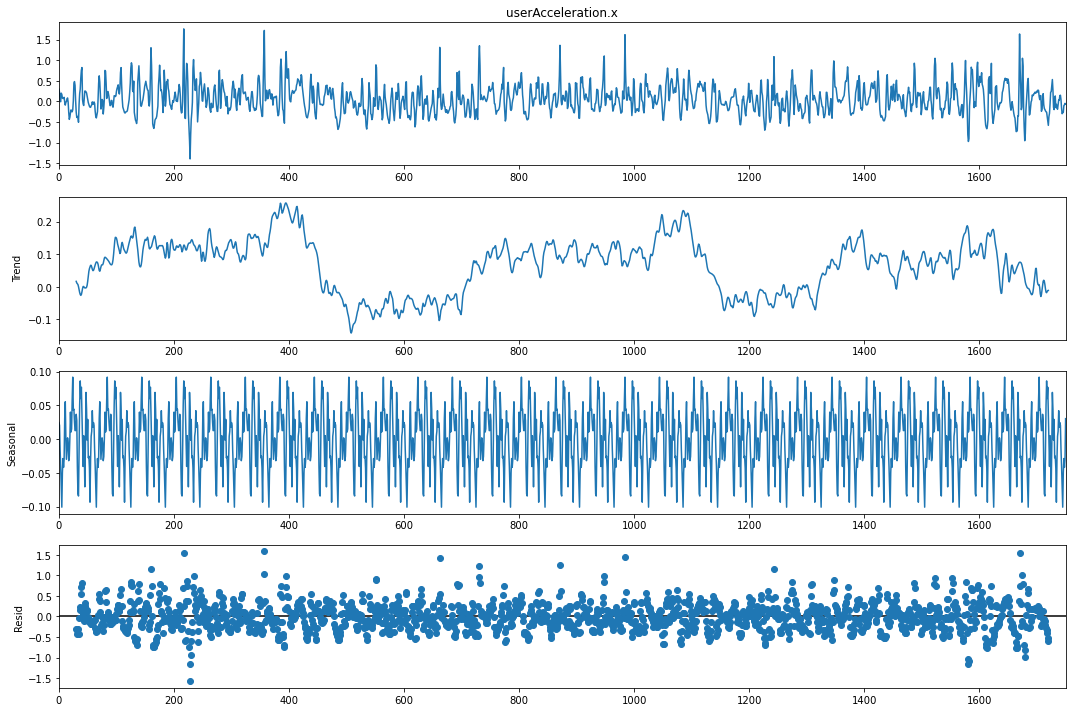

In [143]:
plt.rcParams["figure.figsize"]=(15,10)
descomposition = sm.tsa.seasonal_decompose(sensorxs['userAcceleration.x'], period = 60)
descomposition.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

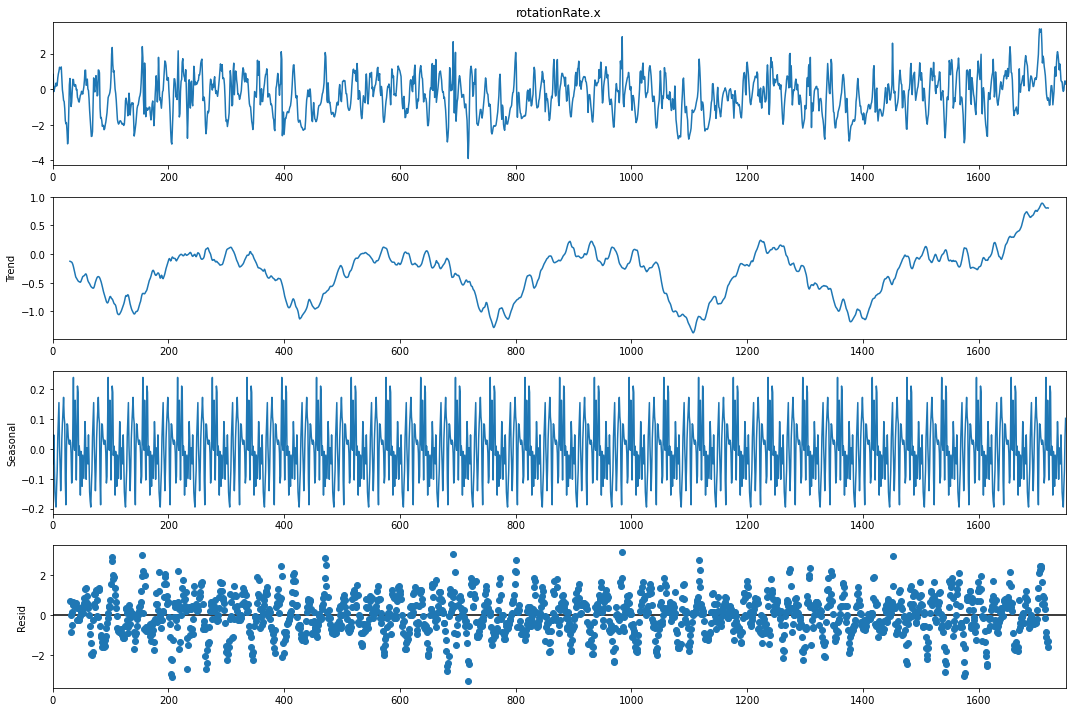

In [155]:
plt.rcParams["figure.figsize"]=(15,10)
descomposition_1 = sm.tsa.seasonal_decompose(sensorxs['rotationRate.x'], period = 60)
descomposition_1.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

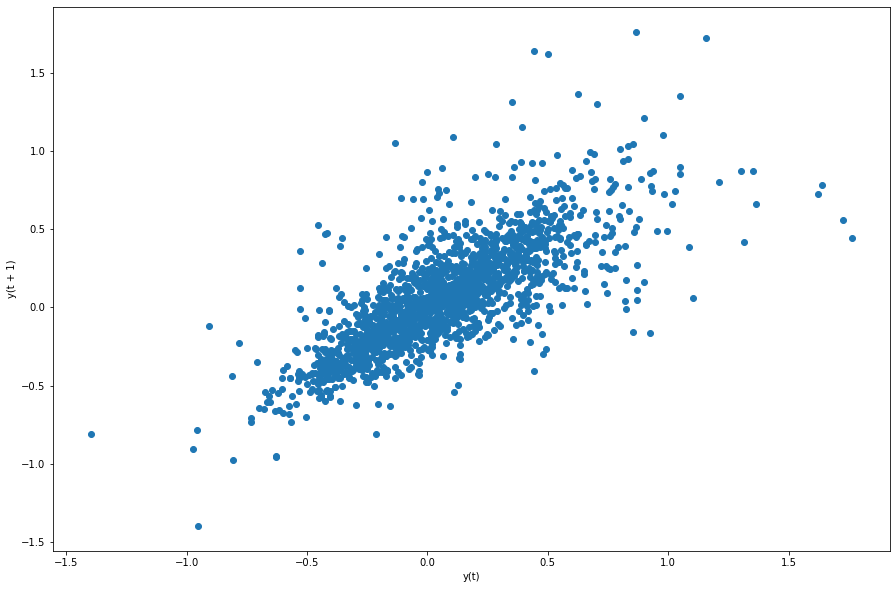

In [130]:
# Your code here:

pd.plotting.lag_plot(sensorxs['userAcceleration.x']);

Create a lag plot for `rotationRate.x`

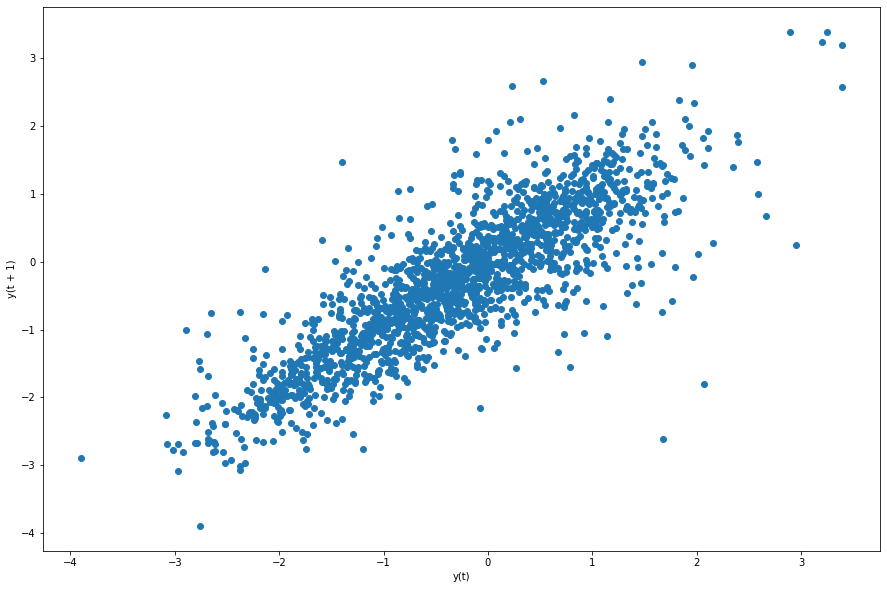

In [128]:
# Your code here:

pd.plotting.lag_plot(sensorxs['rotationRate.x']);

What are your conclusions from both visualizations?

In [157]:
# Your conclusions here:
'''
This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate.
'''


'\nThis shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate.\n'

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [153]:
# Your code here:

#ADF Test userAcceleration.x:
result = adfuller(sensorxs['userAcceleration.x'], autolag ='AIC')
print(f' ADF Statistic:{result[0]}')
print(f' p-value:{result[1]}')

#ADF Test rotationRate.x:
result = adfuller(sensorxs['rotationRate.x'], autolag ='AIC')
print(f' ADF Statistic:{result[0]}')
print(f' p-value:{result[1]}')

 ADF Statistic:-17.957994086169762
 p-value:2.823439483037483e-30
 ADF Statistic:-5.269860625086428
 p-value:6.320230335911989e-06


What are your conclusions from this test?

In [156]:
# Your conclusions here:
'''
The null hypothesis is that the time series has a unit root and is not stationary. Then, if the P-value in the ADH test is less than the significance level (0.05), reject the null hypothesis. In both cases it is stationary.
'''

'\nLa hipótesis nula es que la serie temporal posee una raíz unitaria y no es estacionaria. Entonces, si el valor P en la prueba ADH es menor que el nivel designificancia (0.05), rechaza la hipótesis nula. En ambos casos es estacionaria\n'

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [183]:
model_training = pm.auto_arima(sensorxs['userAcceleration.x'][0:len(sensorxs['userAcceleration.x']-10)])
model_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1751
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 379.399
Date:                Sat, 19 Mar 2022   AIC                           -748.798
Time:                        18:26:40   BIC                           -721.458
Sample:                             0   HQIC                          -738.692
                               - 1751                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0244      0.006      3.759      0.000       0.012       0.037
ar.L1          0.9888      0.036     27.765      0.000       0.919       1.059
ar.L2         -0.3788      0.032    -11.684      0.000      -0.442      -0.315
ma.L1          0.1821      0.039      4.657      0.000       0.105       0.259
sigma2         0.0379      0.001     46.283      0.000       0.036       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1812.20
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.35
Prob(H) (two-sided):                  0.63   Kurtosis:                         7.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [184]:
model_training.predict(n_periods = 10)

array([-0.03504699,  0.01435709,  0.05185799,  0.07022557,  0.07418283,
        0.07113852,  0.06662938,  0.06332388,  0.06176338,  0.06147241])

In [185]:
sensorxs['userAcceleration.x'].tail(10)

1741    0.149749
1742    0.038461
1743   -0.169175
1744   -0.300361
1745   -0.270174
1746   -0.268367
1747   -0.102444
1748   -0.085590
1749   -0.048105
1750   -0.065011
Name: userAcceleration.x, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [187]:
# Your code here:

rmse(model_training.predict(n_periods = 10), sensorxs['userAcceleration.x'].tail(10), axis=0)

0.2309970644127164

In [188]:
'''RMSE cuantifica cuán diferente es un conjunto de valores. Cuanto más pequeño es un valor RMSE, más cercanos son los valores predichos y observados.'''

'RMSE cuantifica cuán diferente es un conjunto de valores. Cuanto más pequeño es un valor RMSE, más cercanos son los valores predichos y observados.'